In [ ]:
#prompting
#start -> generate topic outline -> generate blog -> end

In [8]:
from langgraph.graph import StateGraph,START,END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

In [9]:
load_dotenv()

model = ChatOpenAI()

In [10]:
# state : topic , outline , blog

class BlogState(TypedDict):
    title : str
    outline : str
    content : str
    score : str

In [12]:
def create_outline(state : BlogState) -> BlogState :

    topic = state['title']

    #cal llm to get outline

    prompt = f'Generate a detailed outline for a topic {topic}'
    outline = model.invoke(prompt).content
    state['outline'] = outline
    return state

def create_blog(state : BlogState) -> BlogState : 

    outline = state['outline']
    #prompt
    prompt = f'Generate a detailed blog for {outline}'
    content = model.invoke(prompt).content
    state['content'] = content
    return state

def evaluate_blog(state : BlogState) -> BlogState : 

    title = state['title']
    outline = state['outline']
    content = state['content']

    prompt = f'Based on title {title} and outline {outline} rate content {content}'
    score = model.invoke(prompt).content
    state['score'] = score
    return state

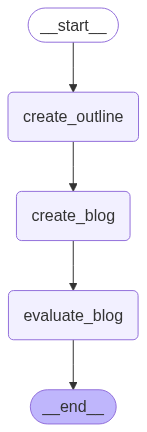

In [13]:
graph = StateGraph(BlogState)

#add nodes

graph.add_node('create_outline',create_outline)
graph.add_node('create_blog',create_blog)
graph.add_node('evaluate_blog',evaluate_blog)
#add edge

graph.add_edge(START,'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_blog','evaluate_blog')
graph.add_edge('evaluate_blog',END)


graph.compile()

In [14]:
#in langchain you couldnt access outline in end 
#but here you can 
workflow = graph.compile()

In [ ]:
initial_state = {'title' : 'Rise of AI in India'}

final_state = workflow.invoke(initial_state)

print(final_state['outline'])